In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/ML\ assignment\ 2


/content/drive/MyDrive/ML assignment 2


In [ ]:
from copy import *
from math import *
import h5py
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn import tree
import pickle
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB

In [ ]:

Best_depth=0

DT_average=0
GNB_average=0

X_Train=np.array([])
X_Test=np.array([])
Y_Train=np.array([])
Y_Test=np.array([])

X_Train_A=np.array([])
X_Test_A=np.array([])
Y_Train_A=np.array([])
Y_Test_A=np.array([])

X_Train_B=np.array([])
X_Test_B=np.array([])
Y_Train_B=np.array([])
Y_Test_B=np.array([])

xtrain_local=np.array([])
ytrain_local=np.array([])
ytest_local=np.array([])
xtest_local=np.array([])
# initialising global variables to be used in classes below



# function to implement decision trees
def dt_func(Xtrain,Ytrain,Xtest,Ytest,MAX_gs=0,MAX_K=0):
    grid_search=[]
    for i in range(1,20):
        grid_search.append(i)
    DAD=[]

    # applying loop for Grid Search over depths randing from 1 to 20
    for ind in range(len(grid_search)):
        accuracy=[]
        K=4
        # implementing 4 fold cross validation to set train:validation :: 60:20
        LL=len(Xtrain[0])
        LY=len(Ytrain[0])

        delta=len(Xtrain)//K
        batch_size1=0
        batch_size2=delta

        # applying loop for Kfold
        for i in range(K):
            XTRAIN=np.array([])
            XTEST=np.array([])
            YTRAIN=np.array([])
            YTEST=np.array([])
            
            # forming folds and training my model
            for j in range(len(Xtrain)):
                if j<batch_size1 or j>=batch_size2-1:
                    XTRAIN=np.append(XTRAIN,Xtrain[j])
                    YTRAIN=np.append(YTRAIN,Ytrain[j])
                else:
                    XTEST=np.append(XTEST,Xtrain[j])
                    YTEST=np.append(YTEST,Ytrain[j])

            XTRAIN=XTRAIN.reshape(len(XTRAIN)//LL,LL)
            XTEST=XTEST.reshape(len(XTEST)//LL,LL)
            YTRAIN=YTRAIN.reshape(len(YTRAIN)//LY,LY)
            YTEST=YTEST.reshape(len(YTEST)//LY,LY)

            # implementing dt model from sklearn with argument max_depth=grid_search[ind] to do grid search over values 
            clf = tree.DecisionTreeClassifier(random_state=0,max_depth=grid_search[ind])
            clf.fit(XTRAIN, YTRAIN)
            YPRED=clf.predict(XTEST)  
            # training model and predicting labels to find accuracy
            accuracy.append(metrics.accuracy_score(YTEST, YPRED)*100)
            
            # for every fold saving dataset for maximum accuracy
            if accuracy[-1]>MAX_K:
                MAX_K=accuracy[-1]
                xtrain_local=XTRAIN
                ytrain_local=YTRAIN
                xtest_local=XTEST
                ytest_local=YTEST
            
            # moving to the next fold 
            batch_size1+=delta
            batch_size2+=delta

        print(accuracy)
        DAD.append(sum(accuracy)/len(accuracy))
        print(DAD[-1])

        # saving dataset for best depth
        if DAD[-1]>MAX_gs:
            MAX_gs=DAD[-1]
            X_Train_A=xtrain_local
            Y_Train_A=ytrain_local
            X_Test_A=xtest_local
            Y_Test_A=ytest_local
        
        

    IND=DAD.index(max(DAD))
    Best_depth=grid_search[IND]
    # saving best depth
    print("Optimal Depth= ",grid_search[IND])
    
    Xtrain,Xval,Ytrain,Yval=train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=0)

    training_accuracy=[]
    validation_accuracy=[]
    # to plot training accuracy vs validation accuracy
    for i in range(len(grid_search)):
        clf = tree.DecisionTreeClassifier(random_state=0,max_depth=grid_search[i])
        # training model and predicting labels for both training and validation sets
        clf.fit(Xtrain, Ytrain)
        YPRED1=clf.predict(Xtrain)  
        YPRED2=clf.predict(Xval)  
        training_accuracy.append(metrics.accuracy_score(Ytrain, YPRED1)*100)
        validation_accuracy.append(metrics.accuracy_score(Yval, YPRED2)*100)
        # storing accuracies in a list

    plt.plot(training_accuracy,'b-', label="Training")
    plt.plot(validation_accuracy,'r-', label="Validation")
    # plotting 
    plt.legend()
    plt.show()


    DT_average=MAX_gs
    return DT_average,X_Train_A,Y_Train_A
    # returning average accuracy over folds and datasets



# function to implement Gaussian Naive Bayes
def gnb_func(Xtrain,Ytrain,Xtest,Ytest,MAX=0):
    accuracy=[]
    K=4
    LL=len(Xtrain[0])
    LY=len(Ytrain[0])

    delta=len(Xtrain)//K
    batch_size1=0
    batch_size2=delta
    # implementing 4 fold cross validation to set train:validation :: 60:20

    # applying loop for Kfold
    for i in range(K):
        XTRAIN=np.array([])
        XTEST=np.array([])
        YTRAIN=np.array([])
        YTEST=np.array([])
        
        # forming folds and training my model
        for j in range(len(Xtrain)):
            if j<batch_size1 or j>=batch_size2-1:
                XTRAIN=np.append(XTRAIN,Xtrain[j])
                YTRAIN=np.append(YTRAIN,Ytrain[j])
            else:
                XTEST=np.append(XTEST,Xtrain[j])
                YTEST=np.append(YTEST,Ytrain[j])

        XTRAIN=XTRAIN.reshape(len(XTRAIN)//LL,LL)
        XTEST=XTEST.reshape(len(XTEST)//LL,LL)
        YTRAIN=YTRAIN.reshape(len(YTRAIN)//LY,LY)
        YTEST=YTEST.reshape(len(YTEST)//LY,LY)

        # implementing dt model from sklearn with argument max_depth=grid_search[ind] to do grid search over values 
        clf=GaussianNB()
        clf.fit(XTRAIN, YTRAIN)
        YPRED=clf.predict(XTEST)  
        accuracy.append(metrics.accuracy_score(YTEST, YPRED)*100)
        # storing accuracies in a list

        
        if accuracy[-1]>MAX:
            MAX=accuracy[-1]
            X_Train_B=XTRAIN
            Y_Train_B=YTRAIN
            X_Test_B=XTEST
            Y_Test_B=YTEST
        
        batch_size1+=delta
        batch_size2+=delta

    print(accuracy)
    GNB_average=sum(accuracy)/len(accuracy)
    return GNB_average,X_Train_B,Y_Train_B



In [ ]:
# creating a class having functions to calculate various metrics for part d
class partd:
    
    def __init__(self):
        self.pair_prec=[]
        self.pair_rec=[]
        self.pair_f1=[]
    
    def accuracy(self,YTEST,YPRED):
        # basic accuracy function to find ratio of right classifications to total classifications
        temp=YPRED[YPRED==YTEST]
        return (len(temp)/len(YTEST))*100
    

    def conf_matrix(self,YTEST,YPRED):
        var=len(np.unique(YTEST))
        # defining size of matrix
        matrix=np.zeros((var,var))
        
        # adds value corresponding to row and column, i.e. actual class label and predicted class label
        for i in range(len(YTEST)):
            matrix[int(YTEST[i])][int(YPRED[i])]+=1
        return matrix
        
    # precision= TP/TP+FP
    def precision(self,YTEST,YPRED):
        self.pair_prec=[]
        conf_matr=self.conf_matrix(YTEST,YPRED)
        # calling confusion matrix func and finding sum over row
        pre_=[]
        S=np.sum(conf_matr,axis=0)
        var=len(np.unique(YTEST))
        
        for i in range(var):
            pre_.append(conf_matr[i][i]/S[i])
            self.pair_prec.append([conf_matr[i][i],S[i]])
        return pre_
            
    # recall=TP/TP+FN
    def recall(self,YTEST,YPRED):
        self.pair_rec=[]
        
        conf_matr=self.conf_matrix(YTEST,YPRED)
        rec_=[]
        # calling confusion matrix func and finding sum over row
        S=np.sum(conf_matr,axis=1)
        var=len(np.unique(YTEST))
        
        for i in range(var):
            rec_.append(conf_matr[i][i]/S[i])
            self.pair_rec.append([conf_matr[i][i],S[i]])
        return rec_
    
    # harmoic mean of recall and precision
    def f1(self,YTEST,YPRED):
        self.pair_f1=[]
        
        pre_=self.precision(YTEST,YPRED)
        rec_=self.recall(YTEST,YPRED)
        var=len(np.unique(YTEST))
        f1_=[]
        
        for i in range(len(pre_)):
            f1_.append( (2*pre_[i]*rec_[i])/(pre_[i]+rec_[i]))
            self.pair_f1.append( [2*pre_[i]*rec_[i],pre_[i]+rec_[i]])
        return f1_
    
    # return average
    def micro(self,l):
        return sum(l)/len(l)
    
    # sum of numerators/sum of denominators
    def macro(self,l):
        Num=0
        Den=0
        for i in range(len(l)):
            Num+=l[i][0]
            Den+=l[i][1]
        return Num/(Num+Den)
    
    # roc curve for binary class classification problem
    def roc_curve(self,clf,Xtest,YTEST):
        # calculating probabilities of class labels
        y_scores=clf.predict_proba(Xtest)
        YY=y_scores[:,1]

        # creating threshold array
        thresholds=[0]
        for i in range(1000):
            thresholds.append(thresholds[-1]+1)
        for i in range(len(thresholds)):
            thresholds[i]/=1000

        fpr=np.zeros(len(thresholds))
        tpr=np.zeros(len(thresholds))


        for i in range(len(thresholds)):
            # checking if our class label prob is greater than a threshold value and assigns 1 else assigns 0
            pred=np.array(YY>=thresholds[i],dtype='int')
            cm=c.conf_matrix(YTEST, pred)

            # True pos rate= TP/TP+FN
            tpr[i]=cm[1,1]/(cm[1,1]+cm[1,0])

            # False pos rate= FP/FP+TN
            fpr[i]=cm[0,1]/(cm[0,1]+cm[0,0])

        return [fpr,tpr]

        
    # roc curve for multiclass classification problem
    def roc_curve_datasetA(self,clf,Xtest,YTEST):

        # calculating probabilities of class labels
        y_scores=clf.predict_proba(Xtest)
        thresholds=[0]

        # creating threshold array
        for i in range(1000):
            thresholds.append(thresholds[-1]+1)
        for i in range(len(thresholds)):
            thresholds[i]/=1000

        # iterating over all class labels
        for j in range(10):
            YYY=np.array(YTEST==j,dtype='int')
            fpr=np.zeros(len(thresholds)+1)
            tpr=np.zeros(len(thresholds)+1)
            
            for i in range(len(thresholds)):
            # checking if our class label prob is greater than a threshold value and assigns 1 else assigns 0
                pred=np.array(y_scores[:,j]>=thresholds[i],dtype='int')
                cm=c.conf_matrix(YYY, pred)
                
                # True pos rate= TP/TP+FN
                tpr[i+1]=cm[1,1]/(cm[1,1]+cm[1,0])
                
                fpr[i+1]=cm[0,1]/(cm[0,1]+cm[0,0])
                
            tt=[]
            for k in range(len(tpr)):
                tt.append((fpr[k],tpr[k]))
            tt.sort()
            fpr=[]
            tpr=[]
            # sorting over tpr and fpr values before plotting
            
            for k in range(len(tt)):
                fpr.append(tt[k][0])
                tpr.append(tt[k][1])
            # plotting for all class labels
            plt.plot(fpr,tpr, label="Class "+str(j))
        plt.legend()
        plt.show()

In [ ]:
# DATASET A
hf=h5py.File('part_A_train.h5','r')
X=np.array(hf['X'])
Y=np.array(hf['Y'])


[r,c]=Y.shape
yy=np.array([])
for i in range(r):
    for j in range(c):
        if Y[i,j]==1:
            yy=np.append(yy,[int(j)])

Y=yy.reshape(-1,1)

# splitting into 80:20 ratio
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)

scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

f = open("model_save_A.pkl" , "rb")
clf= pickle.load(f)
f.close()


y_pred=clf.predict(Xtest)  

YTEST=Ytest
YPRED=y_pred
YTEST=(YTEST.reshape(1,len(YTEST)))[0]
YPRED=(YPRED.reshape(1,len(YPRED)))[0]

        
# finding metrics of bes model by creating object of partdd class
c=partd()
CM=c.conf_matrix(YTEST,YPRED)
print(CM)
print("Accuracy= ",c.accuracy(YTEST,YPRED))




[[67.  0.  3.  0.  0.  5.  2.  0.  1.  2.]
 [ 0. 91.  2.  1.  1.  0.  0.  1.  3.  0.]
 [ 2.  0. 53.  9.  1.  1.  3.  2.  6.  2.]
 [ 1.  0.  4. 64.  2.  4.  0.  1.  6.  3.]
 [ 0.  2.  2.  4. 53.  4.  5.  3.  0. 10.]
 [ 3.  0.  4.  7.  0. 48.  6.  1.  5.  6.]
 [ 1.  0. 10.  1.  4.  4. 65.  0.  3.  0.]
 [ 0.  3.  2.  4.  1.  1.  1. 69.  0.  5.]
 [ 3.  2.  5.  4.  5.  3.  4.  1. 50.  5.]
 [ 2.  2.  4.  3.  5.  1.  3.  6.  4. 48.]]
Accuracy=  72.38095238095238


[20.500595947556615, 17.401668653158524, 19.30870083432658, 20.262216924910607]
19.368295589988083
[33.134684147795, 30.512514898688913, 32.30035756853397, 35.280095351609056]
32.80691299165673
[43.62336114421931, 39.33253873659118, 46.722288438617404, 44.69606674612634]
43.59356376638856
[53.51609058402861, 51.13230035756854, 54.94636471990465, 52.80095351609059]
53.098927294398095
[63.88557806912991, 63.05125148986889, 63.05125148986889, 62.81287246722288]
63.20023837902264
[66.98450536352802, 66.626936829559, 67.22288438617402, 68.05721096543505]
67.22288438617402
[70.32181168057211, 70.79856972586413, 69.8450536352801, 70.67938021454113]
70.41120381406436
[71.51370679380214, 71.63289630512514, 70.67938021454113, 73.18235995232419]
71.75208581644816
[71.99046483909416, 72.22884386174016, 71.99046483909416, 72.22884386174016]
72.10965435041716
[71.27532777115614, 71.51370679380214, 71.27532777115614, 73.89749702026222]
71.99046483909416
[72.58641239570917, 70.44100119189511, 73.30154

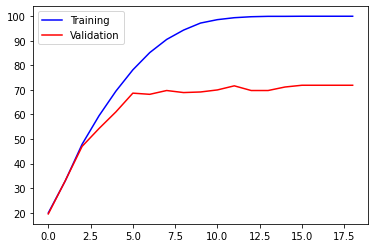

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[56.01907032181168, 58.04529201430274, 56.7342073897497, 53.75446960667462]
DT average accuracy over folds=  72.97377830750894
GNB average accuracy over folds=  56.13825983313468
DT winner
[[67.  0.  3.  0.  0.  5.  2.  0.  1.  2.]
 [ 0. 91.  2.  1.  1.  0.  0.  1.  3.  0.]
 [ 2.  0. 53.  9.  1.  1.  3.  2.  6.  2.]
 [ 1.  0.  4. 64.  2.  4.  0.  1.  6.  3.]
 [ 0.  2.  2.  4. 53.  4.  5.  3.  0. 10.]
 [ 3.  0.  4.  7.  0. 48.  6.  1.  5.  6.]
 [ 1.  0. 10.  1.  4.  4. 65.  0.  3.  0.]
 [ 0.  3.  2.  4.  1.  1.  1. 69.  0.  5.]
 [ 3.  2.  5.  4.  5.  3.  4.  1. 50.  5.]
 [ 2.  2.  4.  3.  5.  1.  3.  6.  4. 48.]]
Accuracy=  72.38095238095238

Micro
Precision=  72.38095238095238
Recall=  72.38095238095238
F1=  72.38095238095238

Macro
Precision=  41.988950276243095
Recall=  41.988950276243095
F1=  42.28086287492053


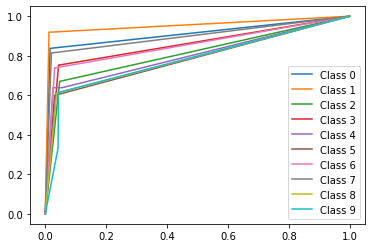

In [ ]:



# DATASET A
hf=h5py.File('part_A_train.h5','r')
X=np.array(hf['X'])
Y=np.array(hf['Y'])


[r,c]=Y.shape
yy=np.array([])
for i in range(r):
    for j in range(c):
        if Y[i,j]==1:
            yy=np.append(yy,[int(j)])

Y=yy.reshape(-1,1)

# splitting into 80:20 ratio
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)

scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)
# scaling our dataset


# calling our models to evaluate average accuracies and compare them
[DT_average,X_Train_A,Y_Train_A]=dt_func(Xtrain,Ytrain,Xtest,Ytest)
[GNB_average,X_Train_B,Y_Train_B]=gnb_func(Xtrain,Ytrain,Xtest,Ytest)

print("DT average accuracy over folds= ",DT_average)
print("GNB average accuracy over folds= ",GNB_average)


# save model with higher average accuracy
if DT_average>=GNB_average:
    clf=tree.DecisionTreeClassifier(random_state=0,max_depth=13)
    clf.fit(X_Train_A,Y_Train_A)
    # save model into pickle file
    f = open("model_save_A.pkl", "wb")
    pickle.dump(clf ,f)
    f.close()
    print("DT winner")

else:
    clf=GaussianNB()
    clf.fit(X_Train_B,Y_Train_B)
    # save model into pickle file
    f = open("model_save_A.pkl", "wb")
    pickle.dump(clf ,f)
    f.close()
    print("GNB winner")




# read serialized object from pickle file
f = open("model_save_A.pkl" , "rb")
clf= pickle.load(f)
f.close()


y_pred=clf.predict(Xtest)  

YTEST=Ytest
YPRED=y_pred
YTEST=(YTEST.reshape(1,len(YTEST)))[0]
YPRED=(YPRED.reshape(1,len(YPRED)))[0]

        
# finding metrics of bes model by creating object of partdd class
c=partd()
CM=c.conf_matrix(YTEST,YPRED)
print(CM)
print("Accuracy= ",c.accuracy(YTEST,YPRED))

# printing micro and macro metrics
print()
print("Micro")
print("Precision= ",c.accuracy(YTEST,YPRED))
print("Recall= ",c.accuracy(YTEST,YPRED))
print("F1= ",c.accuracy(YTEST,YPRED))

DD1=c.micro(c.precision(YTEST,YPRED))*100
DD2=c.micro(c.recall(YTEST,YPRED))*100
DD3=c.micro(c.f1(YTEST,YPRED))*100

print()
print("Macro")
print("Precision= ",c.macro(c.pair_prec)*100)
print("Recall= ",c.macro(c.pair_rec)*100)
print("F1= ",c.macro(c.pair_f1)*100)


# plot roc curve for multi class
c.roc_curve_datasetA(clf,Xtest,YTEST)



[57.44934445768772, 56.4958283671037, 55.18474374255066, 54.350417163289634]
55.870083432657935
[58.04529201430274, 58.76042908224076, 54.70798569725864, 55.661501787842674]
56.7938021454112
[56.853396901072706, 59.11799761620977, 56.25744934445769, 57.68772348033373]
57.479141835518476
[58.64123957091776, 60.1907032181168, 58.87961859356376, 58.164481525625746]
58.96901072705602
[59.952324195470794, 61.38259833134684, 59.23718712753278, 57.210965435041714]
59.44576877234803
[57.44934445768772, 62.336114421930866, 56.6150178784267, 58.87961859356376]
58.820023837902255
[57.56853396901073, 59.952324195470794, 57.56853396901073, 57.80691299165673]
58.224076281287246
[59.952324195470794, 58.283671036948746, 57.44934445768772, 56.97258641239571]
58.164481525625746
[56.4958283671037, 58.164481525625746, 57.091775923718714, 56.853396901072706]
57.151370679380214
[58.164481525625746, 58.283671036948746, 55.780691299165674, 56.853396901072706]
57.270560190703215
[57.56853396901073, 59.71394517

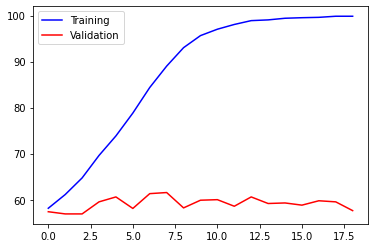

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[58.87961859356376, 56.853396901072706, 58.402860548271754, 54.82717520858165]
DT average accuracy over folds=  59.44576877234803
GNB average accuracy over folds=  57.24076281287247
DT winner
[[188. 224.]
 [133. 295.]]
Accuracy=  57.49999999999999

Micro
Precision=  57.49999999999999
Recall=  57.49999999999999
F1=  57.49999999999999

Macro
Precision=  36.507936507936506
Recall=  36.507936507936506
F1=  36.43332162510669


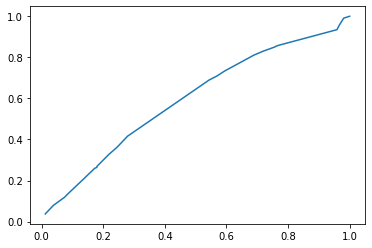

In [ ]:

# DATASET B
hf=h5py.File('part_B_train.h5','r')
X=np.array(hf['X'])
Y=np.array(hf['Y'])


[r,c]=Y.shape
yy=np.array([])
for i in range(r):
    for j in range(c):
        if Y[i,j]==1:
            yy=np.append(yy,[int(j)])

Y=yy.reshape(-1,1)

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X, Y, test_size=0.2, random_state=0)

scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)
# standardise data

# comapre average accuracies
[DT_average,X_Train_A,Y_Train_A]=dt_func(Xtrain,Ytrain,Xtest,Ytest)
[GNB_average,X_Train_B,Y_Train_B]=gnb_func(Xtrain,Ytrain,Xtest,Ytest)

print("DT average accuracy over folds= ",DT_average)
print("GNB average accuracy over folds= ",GNB_average)



# save best model
if DT_average>=GNB_average:
    clf=tree.DecisionTreeClassifier(random_state=0,max_depth=5)
    clf.fit(X_Train_A,Y_Train_A)
    f = open("model_save_B.pkl", "wb")
    pickle.dump(clf ,f)
    f.close()
    print("DT winner")

else:
    clf=GaussianNB()
    clf.fit(X_Train_B,Y_Train_B)
    f = open("model_save_B.pkl", "wb")
    pickle.dump(clf ,f)
    f.close()
    print("GNB winner")



f = open("model_save_B.pkl" , "rb")
clf= pickle.load(f)
f.close()


y_pred=clf.predict(Xtest)  
# predict label from loaded model

YTEST=Ytest
YPRED=y_pred
YTEST=(YTEST.reshape(1,len(YTEST)))[0]
YPRED=(YPRED.reshape(1,len(YPRED)))[0]

# calculating metrics
c=partd()
print(c.conf_matrix(YTEST,YPRED))
print("Accuracy= ",c.accuracy(YTEST,YPRED))

print()
print("Micro")
print("Precision= ",c.accuracy(YTEST,YPRED))
print("Recall= ",c.accuracy(YTEST,YPRED))
print("F1= ",c.accuracy(YTEST,YPRED))

DD1=c.micro(c.precision(YTEST,YPRED))*100
DD2=c.micro(c.recall(YTEST,YPRED))*100
DD3=c.micro(c.f1(YTEST,YPRED))*100

print()
print("Macro")
print("Precision= ",c.macro(c.pair_prec)*100)
print("Recall= ",c.macro(c.pair_rec)*100)
print("F1= ",c.macro(c.pair_f1)*100)


# plot roc curve for binary class
[fpr,tpr]=c.roc_curve(clf,Xtest,YTEST)
plt.plot(fpr,tpr)
plt.show()